In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

**Machine Learning**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

**Datasets**

In [5]:
Ttrain = pd.read_csv('train.csv')
Ttest = pd.read_csv('test.csv')

**EDA**

In [6]:
print(Ttrain.shape)
print(Ttest.shape)

(891, 12)
(418, 11)


In [7]:
#First 5 rows of training dataset
Ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


891 obsevations in the training dataset with each having 12 columns. 11 of them are predictor variables and 1 is target variable.

In [8]:
#info about train dataset
Ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#statistical details of train datasets
Ttrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
Ttrain.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Missing Values


*   Cabin
*   Age
*   Embarked

Cabin has too many missing value and it is better to drop this variable






In [12]:
#how many missing values each column have in train data
Ttrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#Frequency of eaxh value of Predictor variable - Survived
Ttrain['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

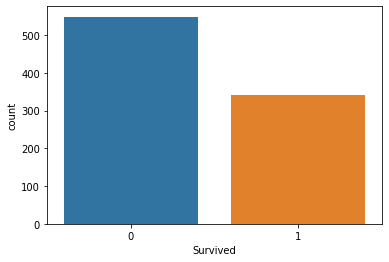

In [14]:
#plot frequency of each value of Predictor variable
sns.countplot(x='Survived', data=Ttrain)

passengers with high fare ticket had a higher chances of survival

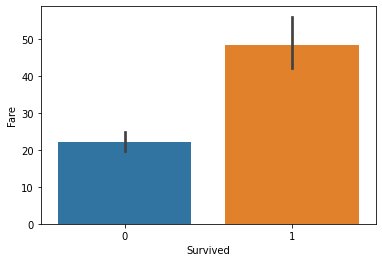

In [15]:
#plot survival vs fare price
sns.barplot(x='Survived', y='Fare', data=Ttrain)

In [16]:
#number of male and female passengers
Ttrain['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

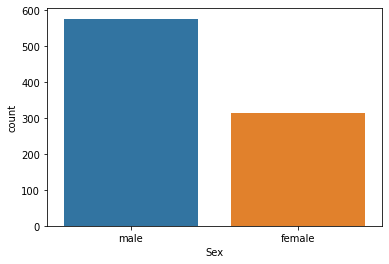

In [17]:
sns.countplot(x='Sex', data=Ttrain)

more male passengers than female

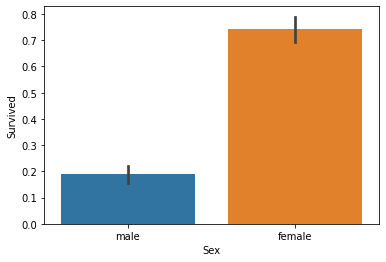

In [18]:
#survival based on sex
sns.barplot(x='Sex', y='Survived', data=Ttrain)

female passengers have higher number of survival than male passengers

In [19]:
Ttrain[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
#Number of Passengers on various Pclass
Ttrain['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

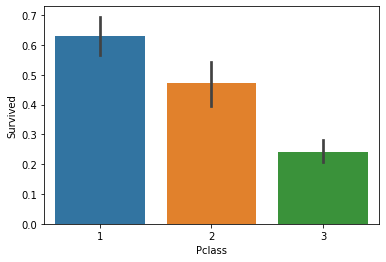

In [21]:
#survival on the basis of Pclass
sns.barplot(x='Pclass', y='Survived', data=Ttrain)

3 had maximum number of passengers very few survived

In [22]:
# % of passengers survived in each class
Ttrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


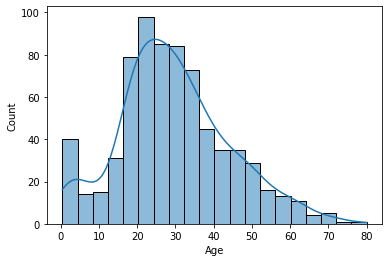

In [23]:
#Histogram plot of age
sns.histplot(data = Ttrain['Age'], kde = True)

Observations:
*   Infants Age <=4 had high survival rate
*   Age = 80 survived
*   Large number of 15-25 years old did not survive







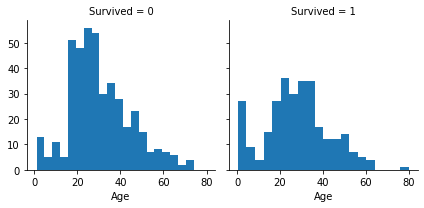

In [24]:
g = sns.FacetGrid(Ttrain, col='Survived')
g.map(plt.hist, 'Age', bins=20)

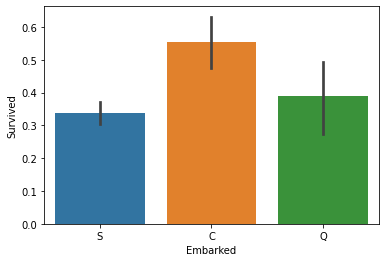

In [25]:
#Survival on the basis of Embarked
sns.barplot(x='Embarked', y='Survived', data=Ttrain)

In [27]:
Ttrain[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [28]:
#Checking correlation among various numerical variables
Ttrain.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


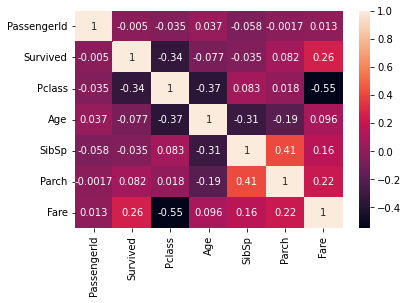

In [29]:
sns.heatmap(Ttrain.corr(), annot=True)

Assumptions based on analysis so far:


*   Impute the missing Age values
*   Impute the missing Embarked values
*   drop Cabin [too many missing values]
*   drop Ticket [many duplicates]
*   drop PassengerID [not helpful]
*   drop Name [not helpful]
*   drop SibSp and Parch as well

**Data Cleaning**

In [30]:
Ttrain.drop(['Name', 'Cabin', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

In [31]:
#impute the missing age values with the mean
Ttrain['Age'].fillna(value=Ttrain['Age'].mean(), inplace=True)

In [32]:
#drop the observations having missing Embarked ( as only 2 of them are missing)
Ttrain.dropna(axis=0, inplace=True)

In [33]:
Ttrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


**Test Dataset**

In [34]:
Ttest.drop(['Name', 'Cabin', 'PassengerId', 'Ticket', 'SibSp','Parch'], axis=1, inplace=True)

In [35]:
#impute the missing age values with the mean
Ttest['Age'].fillna(value=Ttrain['Age'].mean(), inplace=True)

In [36]:
#drop the observations having missing Embarked(as only 2 of them are missing)
Ttest.dropna(axis=0, inplace=True)

In [37]:
Ttest.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


**Featured Engineering**

In [39]:
X_train = Ttrain.iloc[:, 1:].values
y_train = Ttrain.iloc[:, :1].values.ravel()

In [40]:
print(X_train.shape)
print(y_train.shape)

(889, 5)
(889,)


In [41]:
#Encoding the Sex Variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_train = columnTransformer.fit_transform(X_train)

In [43]:
#Encoding the Emberked variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_train = columnTransformer.fit_transform(X_train)

In [44]:
X_train.shape

(889, 8)

In [45]:
X_train

array([[0.0, 0.0, 1.0, ..., 3, 1.0, 7.25],
       [1.0, 0.0, 0.0, ..., 1, 2.0, 71.2833],
       [0.0, 0.0, 1.0, ..., 3, 1.0, 7.925],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 1.0, 23.45],
       [1.0, 0.0, 0.0, ..., 1, 1.0, 30.0],
       [0.0, 1.0, 0.0, ..., 3, 1.0, 7.75]], dtype=object)

**For the Test Dataset**

In [46]:
X_test = Ttest.iloc[:, :].values

In [47]:
#Encoding the Sex Variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_test = columnTransformer.fit_transform(X_test)

In [48]:
#Encoding the Emberked Variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_test = columnTransformer.fit_transform(X_test)

In [49]:
X_test.shape

(417, 8)

In [50]:
X_test

array([[0.0, 1.0, 0.0, ..., 3, 34.5, 7.8292],
       [0.0, 0.0, 1.0, ..., 3, 47.0, 7.0],
       [0.0, 1.0, 0.0, ..., 2, 62.0, 9.6875],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 38.5, 7.25],
       [0.0, 0.0, 1.0, ..., 3, 29.653446370674192, 8.05],
       [1.0, 0.0, 0.0, ..., 3, 29.653446370674192, 22.3583]], dtype=object)

**Modelling**

In [51]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


78.07

In [53]:
#Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

68.39

In [54]:
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

84.93

In [56]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

77.95

In [57]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.03

In [58]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) *100, 2)
acc_random_forest

93.03

**Evaluation**

In [60]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,93.03
5,Decision Tree,93.03
1,KNN,84.93
2,Logistic Regression,78.07
4,Naive Bayes,77.95
0,Support Vector Machines,68.39
